#<h1 align=center><font size = 5>**DATA EXPLORATION AND VISUALIZATION**
<h2 align=center><font size = 3>PROJECT: Video Recommendation System  </font></h2>

> Source:[Grouplens](https://files.grouplens.org/datasets/movielens/ml-latest.zip)



In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [ ]:
#Loading Datasets
ratings_df = pd.read_csv('/ratings.csv')
movies_df = pd.read_csv('/movies.csv')
genome_tags = pd.read_csv('/genome-tags.csv')
links = pd.read_csv('/links.csv')
genome_scores = pd.read_csv('/genome-scores.csv')
tags = pd.read_csv('/tags.csv')

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [ ]:
#Not all movies were rated, null values would exist for some movies in the movies_df
print(movies_df.movieId.nunique())
print(ratings_df.movieId.nunique())

86537
83239


In [ ]:
number_of_reviewers = ratings_df['userId'].nunique()
print('number of reviewers= ', number_of_reviewers)

number of reviewers=  330975


In [ ]:
#number of reviews per movie
reviews_per_movie = ratings_df.movieId.value_counts()
print(reviews_per_movie)
movies_df['num_of_reviews_per_movie'] = movies_df['movieId'].map(reviews_per_movie)
movies_df.head()

318       122296
356       113581
296       108756
2571      107056
593       101802
           ...  
261715         1
257463         1
256693         1
161766         1
269782         1
Name: movieId, Length: 83239, dtype: int64


,movieId,title,genres,num_of_reviews_per_movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76813.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,30209.0
2,3,Grumpier Old Men (1995),Comedy|Romance,15820.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3028.0
4,5,Father of the Bride Part II (1995),Comedy,15801.0


In [ ]:
#To locate other features of certain elements
'''
title_of_element = movies_df.loc[movies_df['num_of_reviews_per_movie'] == , 'movieId'].values[0]
title_of_element
'''

"\ntitle_of_element = movies_df.loc[movies_df['num_of_reviews_per_movie'] == , 'movieId'].values[0]\ntitle_of_element\n"

In [ ]:
#Adding a Rating colmn to the movies_df Dataframe
movie_rating = ratings_df.groupby('movieId')['rating'].mean()
print(movie_rating.sort_values(ascending= False))
movies_df['rating'] = movies_df['movieId'].map(movie_rating)
movies_df.head()

movieId
267038    5.0
282157    5.0
281624    5.0
251222    5.0
246624    5.0
         ... 
277410    0.5
162072    0.5
143661    0.5
258307    0.5
261303    0.5
Name: rating, Length: 83239, dtype: float64


,movieId,title,genres,num_of_reviews_per_movie,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76813.0,3.893508
1,2,Jumanji (1995),Adventure|Children|Fantasy,30209.0,3.278179
2,3,Grumpier Old Men (1995),Comedy|Romance,15820.0,3.171271
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3028.0,2.868395
4,5,Father of the Bride Part II (1995),Comedy,15801.0,3.076957


In [ ]:
movies_df.columns

Index(['movieId', 'title', 'genres', 'num_of_reviews_per_movie', 'rating'], dtype='object')

In [ ]:
#Adding a percentage score column
percentage_score = (movie_rating/5)*100
print(percentage_score)
movies_df['percentage score'] = movies_df['movieId'].map(percentage_score)
movies_df.head()

movieId
1         77.870152
2         65.563574
3         63.425411
4         57.367900
5         61.539143
            ...    
288967    70.000000
288971    10.000000
288975    80.000000
288977    60.000000
288983    60.000000
Name: rating, Length: 83239, dtype: float64


,movieId,title,genres,num_of_reviews_per_movie,rating,percentage score
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76813.0,3.893508,77.870152
1,2,Jumanji (1995),Adventure|Children|Fantasy,30209.0,3.278179,65.563574
2,3,Grumpier Old Men (1995),Comedy|Romance,15820.0,3.171271,63.425411
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3028.0,2.868395,57.367900
4,5,Father of the Bride Part II (1995),Comedy,15801.0,3.076957,61.539143


In [ ]:
#Adding a year column
movies_df['title'] = movies_df['title'].str.strip()
movies_df['year'] = movies_df['title'].apply(lambda x: x[-5:-1])
movies_df.head()

,movieId,title,genres,num_of_reviews_per_movie,rating,percentage score,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76813.0,3.893508,77.870152,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,30209.0,3.278179,65.563574,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,15820.0,3.171271,63.425411,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3028.0,2.868395,57.367900,1995
4,5,Father of the Bride Part II (1995),Comedy,15801.0,3.076957,61.539143,1995


In [ ]:
movies_df['year'].nunique()
#this seems large for the number of years, there are probably some titles that don't fit into 'movie title (movie year)' format

696

In [ ]:
movies_df['year'].unique()
#this confirms the suspision, we would most likely have to drop such movies

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1990', '1991', '1989', '1937',
       '1940', '1969', '1981', '1973', '1970', '1960', '1955', '1959',
       '1968', '1980', '1975', '1986', '1948', '1943', '1950', '1946',
       '1987', '1997', '1974', '1956', '1958', '1949', '1972', '1998',
       '1933', '1952', '1951', '1957', '1961', '1954', '1934', '1944',
       '1963', '1942', '1941', '1953', '1939', '1947', '1945', '1938',
       '1935', '1936', '1926', '1932', '1985', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', '1903', '2007',
       '2008', '2009', '1912', '2010', 'piel', '1913', '2011', '1898',
       '1899', '1894', '2012', '1910', '2013', '983)', '1896', '2014',
      

In [ ]:
#Selecting a range of years to work with (2009 to 2022)
def select_year_range(start, end):
  year_range =[]
  for i in range(start, end+1):
    year_range.append(str(i))
  return year_range


In [ ]:
#Selecting a portion of the data set to work with
movies_sub = movies_df[movies_df['year'].isin(select_year_range(2010, 2023))]
movies_sub.tail()

,movieId,title,genres,num_of_reviews_per_movie,rating,percentage score,year
86529,288957,Ballet Of Blood (2016),Horror,1.0,1.0,20.0,2016
86530,288959,Letters Of Happiness (2019),Children|Drama,1.0,2.0,40.0,2019
86532,288967,State of Siege: Temple Attack (2021),Action|Drama,1.0,3.5,70.0,2021
86533,288971,Ouija Japan (2021),Action|Horror,1.0,0.5,10.0,2021
86536,288983,UNZIPPED: An Autopsy of American Inequality (2...,Documentary,1.0,3.0,60.0,2021


In [ ]:
#movies_sub['year'] = pd.to_datetime(movies_sub['year'], format='%Y')

In [ ]:
movies_sub.reset_index(inplace=True)
del movies_sub['index']
movies_sub.reset_index(inplace=True)

In [ ]:
movies_sub.columns

Index(['index', 'movieId', 'title', 'genres', 'num_of_reviews_per_movie',
       'rating', 'percentage score', 'year'],
      dtype='object')

In [ ]:
movies_sub.head()

,index,movieId,title,genres,num_of_reviews_per_movie,rating,percentage score,year
0,0,73268,Daybreakers (2010),Action|Drama|Horror|Thriller,2085.0,3.234532,64.690647,2010
1,1,73319,Leap Year (2010),Comedy|Romance,1446.0,3.341632,66.832642,2010
2,2,73321,"Book of Eli, The (2010)",Action|Adventure|Drama,8224.0,3.466865,69.337305,2010
3,3,73744,If You Love (Jos rakastat) (2010),Drama|Musical|Romance,14.0,2.750000,55.000000,2010
4,4,73929,Legion (2010),Action|Fantasy|Horror|Thriller,1223.0,2.651676,53.033524,2010


In [ ]:
movies_sub['genres'].nunique()

1020

In [ ]:
#This accounts for the popularity of movies considering their rating and reviews
weighted_average_rating = (movies_sub['rating'] * movies_sub['num_of_reviews_per_movie']) / movies_sub['num_of_reviews_per_movie'].sum()
movies_sub['weighted avg rating'] = movies_sub['index'].map(weighted_average_rating)

<ipython-input-89-cd903cae2c2d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
movies_sub.columns

Index(['index', 'movieId', 'title', 'genres', 'num_of_reviews_per_movie',
       'rating', 'percentage score', 'year', 'weighted avg rating'],
      dtype='object')

In [ ]:
#To locate other features of certain elements

title_of_element = movies_sub.query('index == 0')['title'].values
title_of_element

array(['Daybreakers (2010)'], dtype=object)

In [ ]:
merged_df = pd.merge(movies_sub, links, on='movieId', how='inner')

In [ ]:
tag_group = tags.groupby('movieId')['tag'].agg(lambda x: '|'.join(map(str, x)))
tag_group.tail()

movieId
288765    post-apocalyptic|survival|tw suicide|apocalyps...
288779                                   Don Camillo Series
288849                       addiction|animation|short film
288937                                                anime
288955    catalan|Costa brava|flatmate|Millennials|slow ...
Name: tag, dtype: object

In [ ]:
tag_group.columns = ['movieId', 'tags']
tag_group.head()

movieId
1    animation|friendship|toys|animation|Disney|Pix...
2    animals|based on a book|fantasy|magic board ga...
3    sequel|moldy|old|old age|old men|wedding|old p...
4    characters|chick flick|girl movie|characters|c...
5    family|pregnancy|wedding|4th wall|aging|baby|d...
Name: tag, dtype: object

In [ ]:
merged_df = pd.merge(merged_df, tag_group, on='movieId', how='inner')

In [ ]:
merged_df.head()

,index,movieId,title,genres,num_of_reviews_per_movie,rating,percentage score,year,weighted avg rating,imdbId,tmdbId,tag
0,0,73268,Daybreakers (2010),Action|Drama|Horror|Thriller,2085.0,3.234532,64.690647,2010,0.001371,433362,19901.0,dystopia|dystopic future|Ethan Hawke|gore|vamp...
1,1,73319,Leap Year (2010),Comedy|Romance,1446.0,3.341632,66.832642,2010,0.000982,1216492,25195.0,Ireland|St Patrick's Day|Valentine's Day|Amy A...
2,2,73321,"Book of Eli, The (2010)",Action|Adventure|Drama,8224.0,3.466865,69.337305,2010,0.005796,1037705,20504.0,atmospheric|Bible|Christianity|dystopia|dystop...
3,3,73744,If You Love (Jos rakastat) (2010),Drama|Musical|Romance,14.0,2.750000,55.000000,2010,0.000008,1380130,40660.0,Finnish
4,4,73929,Legion (2010),Action|Fantasy|Horror|Thriller,1223.0,2.651676,53.033524,2010,0.000659,1038686,22894.0,angels|religion|underdeveloped|angels|better t...


In [ ]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.03200
1,1,2,0.02225
2,1,3,0.07000
3,1,4,0.05900
4,1,5,0.12300


In [ ]:
gnome_avg_relevance = genome_scores.groupby('movieId')['relevance'].mean()
gnome_avg_relevance

movieId
1         0.166217
2         0.123091
3         0.089001
4         0.080031
5         0.086698
            ...   
286901    0.131997
286905    0.139567
287377    0.144799
287633    0.118034
288167    0.145506
Name: relevance, Length: 16376, dtype: float64

In [ ]:
merged_df['Average tag relevance'] = merged_df['movieId'].map(gnome_avg_relevance)
merged_df.head()

,index,movieId,title,genres,num_of_reviews_per_movie,rating,percentage score,year,weighted avg rating,imdbId,tmdbId,tag,Average tag relevance
0,0,73268,Daybreakers (2010),Action|Drama|Horror|Thriller,2085.0,3.234532,64.690647,2010,0.001371,433362,19901.0,dystopia|dystopic future|Ethan Hawke|gore|vamp...,0.141043
1,1,73319,Leap Year (2010),Comedy|Romance,1446.0,3.341632,66.832642,2010,0.000982,1216492,25195.0,Ireland|St Patrick's Day|Valentine's Day|Amy A...,0.076850
2,2,73321,"Book of Eli, The (2010)",Action|Adventure|Drama,8224.0,3.466865,69.337305,2010,0.005796,1037705,20504.0,atmospheric|Bible|Christianity|dystopia|dystop...,0.139117
3,3,73744,If You Love (Jos rakastat) (2010),Drama|Musical|Romance,14.0,2.750000,55.000000,2010,0.000008,1380130,40660.0,Finnish,NaN
4,4,73929,Legion (2010),Action|Fantasy|Horror|Thriller,1223.0,2.651676,53.033524,2010,0.000659,1038686,22894.0,angels|religion|underdeveloped|angels|better t...,0.110248


In [ ]:
#drop NaN values in ratings column
merged_df.dropna(subset=['rating','tmdbId'], inplace=True)

In [ ]:
#Export merged_df to a csv file
merged_df.to_csv('movies_dataset.csv', index=False)

## **Visualization**

In [ ]:
genres_expanded = movies_sub.assign(genres=movies_sub['genres'].str.split('|')).explode('genres')
genres_review_count = genres_expanded.groupby('genres')['num_of_reviews_per_movie'].sum().sort_values(ascending=False).reset_index()
print(genres_review_count)

fig = px.bar(genres_review_count, x="num_of_reviews_per_movie", y="genres", color="genres",
             title='Most Popular Genre by Number of Reviews')
fig.show()

                genres  num_of_reviews_per_movie
0                Drama                 2022456.0
1               Action                 1856194.0
2            Adventure                 1379691.0
3               Comedy                 1368882.0
4               Sci-Fi                 1313705.0
5             Thriller                 1298051.0
6                 IMAX                  771219.0
7                Crime                  650983.0
8              Fantasy                  614451.0
9            Animation                  445789.0
10             Romance                  440717.0
11             Mystery                  376992.0
12              Horror                  360384.0
13            Children                  346228.0
14                 War                  155561.0
15         Documentary                  122542.0
16             Western                   86502.0
17             Musical                   61654.0
18  (no genres listed)                   35218.0
19           Film-No

In [ ]:
#Most Popular Movies by Reviews

# Create a horizontal bar chart
fig = px.bar(movies_sub.sort_values(by='num_of_reviews_per_movie', ascending=False).head(20), x="num_of_reviews_per_movie", y="title", color="title",
             title='Most Popular Movies By Number of Reviews')
fig.show()

In [ ]:
fig = px.bar(movies_sub.sort_values(by='weighted avg rating', ascending=False)[:21], x="weighted avg rating", y="title", color="title",
             title='Most Popular Movie By Weighted Average Score')
fig.show()

In [ ]:
fig = px.bar(movies_sub.sort_values(by='percentage score', ascending=False)[100:120], x="percentage score", y="title", color="title",
             title='Most Popular Movie By Percentage score')
fig.show()

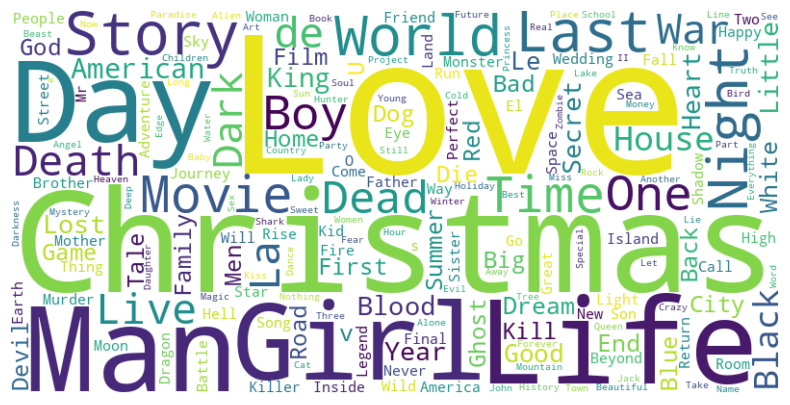

In [ ]:
titles_text = ' '.join(movies_sub['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Heatmap')

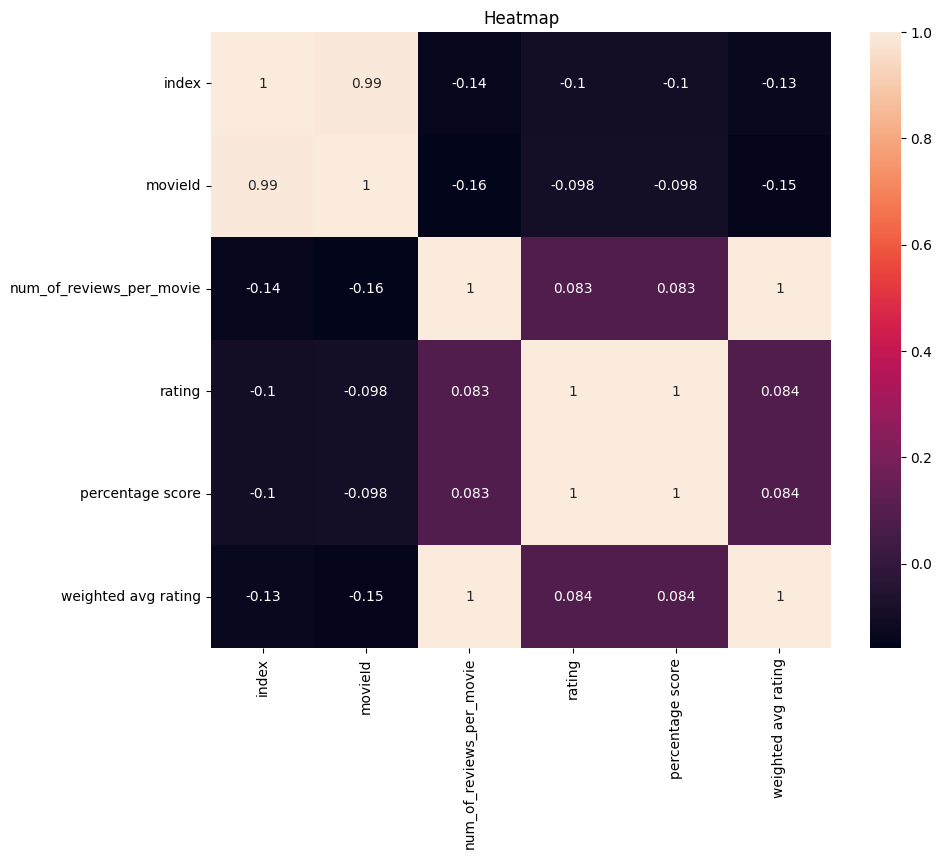

In [ ]:
#Checking relationship between numeric features
plt.figure(figsize=(10,8))
sns.heatmap(movies_sub.corr(numeric_only=True), annot=True)
plt.title("Heatmap")

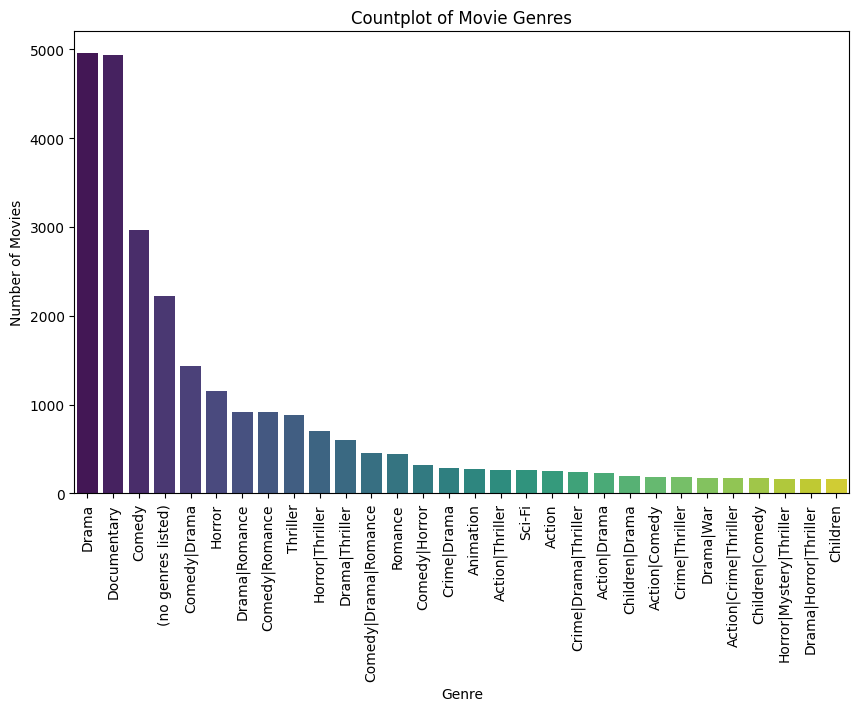

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='genres', data=movies_sub, palette='viridis',order=movies_sub['genres'].value_counts().head(30).index)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Countplot of Movie Genres')

# Show the plot
plt.show()

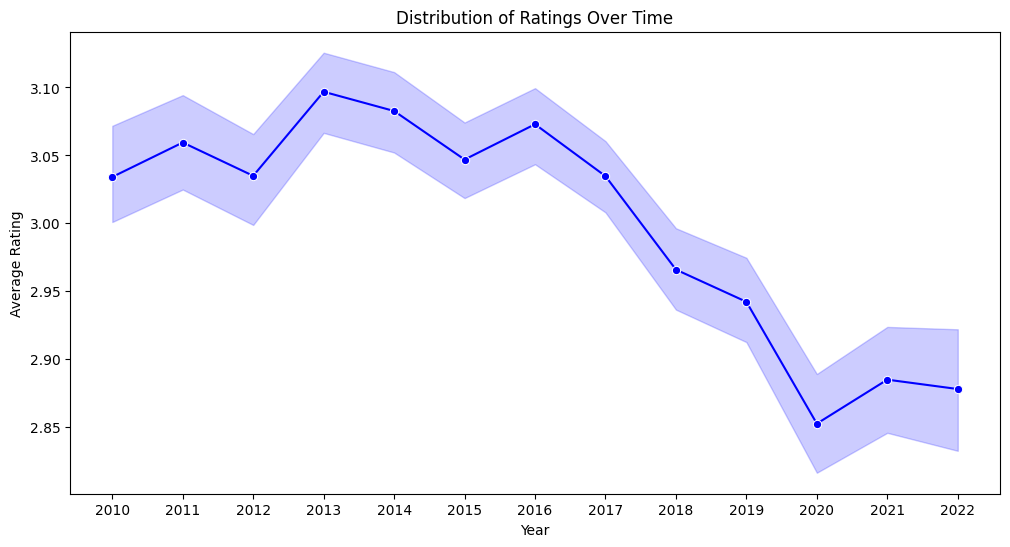

In [ ]:
# Frequency polygon for the distribution of ratings over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rating', data=movies_sub, marker='o', color='blue')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Distribution of Ratings Over Time')

plt.show()